## Lab | Random Forests

#### Libraries.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Apply the Random Forests algorithm but this time only by upscaling the data.

First, we'll load the datasets with pandas. Then, we're going to try to predict whether a customer will donate or not ('TARGET_B').

In [2]:
target = pd.read_csv('files_for_lab/target.csv')
print('Shape:', target.shape)
target.head()

Shape: (95412, 2)


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [3]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
print('Shape:', numerical.shape)
print()
print('Null values:\n',numerical.isna().sum())
numerical.head()

Shape: (95412, 315)

Null values:
 TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [4]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
print('Shape:', categorical.shape)
print()
print('Null values:\n',categorical.isna().sum())
categorical.head()

Shape: (95412, 22)

Null values:
 STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


## Reduce number of features

## Case 1: Random Forest: Will donate or not?
For this model we'll try to predict whether a customer will donate or not. This information is stored in column 'Target B':

* 0 - Won't donate
* 1 - Will donate

In [5]:
data = pd.concat([numerical, categorical, target], axis=1)
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

Separate numerical from categorical data.

In [6]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

In [7]:
numericalX.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,

In [8]:
categoricalX.head()

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


Using OneHotEncoder to encode the categorical variables.

In [9]:
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51

## Reduce the number of features with SelectKBest

1) Scale data.

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

scaler_x = MinMaxScaler().fit(X)
X_scaled = scaler_x.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled = X_scaled.drop('TARGET_D', axis=1)
X_scaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.0,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.00000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.0,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.0,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.0303

2) Apply SelectKBest

In [11]:
kbest = SelectKBest(chi2, k=20)
kbest.fit(X_scaled,y)
X_new = kbest.transform(X_scaled) 
selected_columns = [X.columns[index] for index, value in enumerate(kbest.get_support().tolist()) if value == True]
selected = pd.DataFrame(X_new, columns = selected_columns)
selected.head()

,ETH2,HV1,HV2,ETHC5,HVP1,HVP2,HVP3,HVP4,HVP6,RP1,RP2,NGIFTALL,CARDGIFT,RFA_2F,ODATEW_YR,LASTDATE_YR,10,13,14,15
0,0.010101,0.079833,0.105833,0.000000,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.050505,0.127119,0.341463,1.000000,0.428571,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.911333,0.869667,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.919192,0.008475,0.024390,0.333333,0.785714,0.0,0.0,0.0,0.0,1.0
2,0.020202,0.082833,0.091000,0.010101,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.020202,0.110169,0.341463,1.000000,0.500000,0.0,1.0,1.0,0.0,0.0
3,0.000000,0.166667,0.210500,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.080808,0.063559,0.170732,1.000000,0.285714,0.0,1.0,1.0,0.0,0.0
4,0.989899,0.096000,0.099000,0.585859,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.585859,0.152542,0.195122,0.333333,0.214286,0.5,0.0,0.0,1.0,0.0


In [12]:
# To check the scores
ml = [elem for elem in zip(kbest.scores_, X.columns.tolist())]
ml.sort(reverse=True)
df = pd.DataFrame(data = ml, columns = ['score','col_name'])
df.head(20)

,score,col_name
0,210.290810,RFA_2F
1,92.214021,15
2,87.261743,13
3,50.439150,LASTDATE_YR
4,47.496620,14
5,27.516508,CARDGIFT
6,26.474583,HVP1
7,25.757492,HVP2
8,21.545080,HVP3
9,19.261394,HVP6


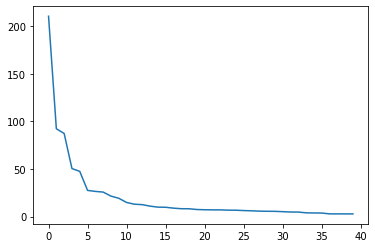

In [37]:
plt.plot(df["score"][:40])
plt.show()

We'll use only the first 6 columns that scored higher with SelectKbest.

In [14]:
X = X[['RFA_2F', 15, 13, 'LASTDATE_YR', 14, 'CARDGIFT']]
X.head()

,RFA_2F,15,13,LASTDATE_YR,14,CARDGIFT
0,4,0.0,0.0,95,1.0,14
1,2,0.0,0.0,95,0.0,1
2,4,0.0,0.0,95,1.0,14
3,4,0.0,0.0,95,1.0,7
4,2,1.0,0.0,96,0.0,8


## X - y split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (76329, 6)
Shape of y_train: (76329,)
Shape of X_test: (19083, 6)
Shape of y_test: (19083,)


## Class imbalance

#### Does our Y (TARGET_B) suffer class imbalance? If so, we need to upscale the minority class.

In [16]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

We could use two methods to oversample the minority class. For this exercise, we'll test both.

### Upscaling by hand

In [17]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

majority_indexes = y_train[y_train == 0].index
minority_indexes = y_train[y_train == 1].index

In [18]:
selected_rows = np.random.choice(minority_indexes, size = len(majority_indexes), replace=True)

In [19]:
X_train_up = X_train.loc[list(selected_rows),:]
y_train_up = y_train[list(selected_rows)]

In [20]:
# Separate majority/minority classes
ros = RandomOverSampler(random_state=42)

X_train_up, y_train_up = ros.fit_resample(X_train, y_train)
display(pd.concat([X_train_up,y_train_up],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_up)) 

,RFA_2F,15,13,LASTDATE_YR,14,CARDGIFT,TARGET_B
0,3,0.0,0.0,96,0.0,8,0
1,1,1.0,0.0,96,0.0,1,0
2,3,0.0,0.0,95,1.0,6,1
3,1,1.0,0.0,95,0.0,7,0
4,1,1.0,0.0,95,0.0,1,0


Resampled dataset shape Counter({0: 72486, 1: 72486})


### Now let's repeat the process with SMOTE.

In [21]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_train_SMOTE.shape)

(76329, 6)
(144972, 6)


In [22]:
y_train_SMOTE.value_counts()

0    72486
1    72486
Name: TARGET_B, dtype: int64

### 1. Random Forest with upscaled data and random parameters.

In [23]:
clf_up = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

clf_up.fit(X_train_up, y_train_up)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf_up.score(X_train_up, y_train_up)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf_up.score(X_test, y_test)))

y_pred = clf_up.predict(X_test)
print()
print()
print('Y test value counts:')
display(y_test.value_counts())

The R2 for the Random Forest in the TRAIN set is 0.59
The R2 for the Random Forest in the TEST  set is 0.61


Y test value counts:


0    18083
1     1000
Name: TARGET_B, dtype: int64


------- CONFUSION MATRIX --------


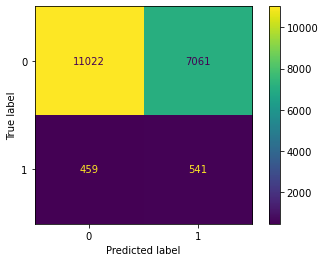


------ CLASSIFICATION REPORT ------
              precision    recall  f1-score   support

           0       0.96      0.61      0.75     18083
           1       0.07      0.54      0.13      1000

    accuracy                           0.61     19083
   macro avg       0.52      0.58      0.44     19083
weighted avg       0.91      0.61      0.71     19083

The accuracy in the TEST set is: 0.61
The precision in the TEST set is: 0.07
The recall in the TEST set is: 0.54
The F1 in the TEST set is: 0.13
The Kappa in the TEST set is: 0.04


In [24]:
print()
print('------- CONFUSION MATRIX --------')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_up.classes_)
disp.plot()
plt.show()

print()
print('------ CLASSIFICATION REPORT ------')
print(classification_report(y_test, y_pred))
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))

### 2. Random Forest using SMOTE and random parameters.

In [25]:
clf_smt = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

clf_smt.fit(X_train_SMOTE, y_train_SMOTE)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf_smt.score(X_train_SMOTE, y_train_SMOTE)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf_smt.score(X_test, y_test)))

y_pred = clf_smt.predict(X_test)
print('')
print('')
print('Y test value counts:')
display(y_test.value_counts())

The R2 for the Random Forest in the TRAIN set is 0.59
The R2 for the Random Forest in the TEST  set is 0.59


Y test value counts:


0    18083
1     1000
Name: TARGET_B, dtype: int64


------- CONFUSION MATRIX --------


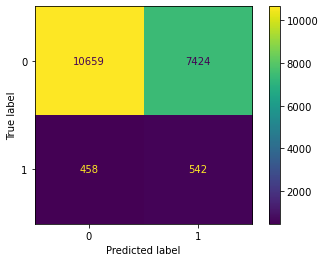


------ CLASSIFICATION REPORT ------
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     18083
           1       0.07      0.54      0.12      1000

    accuracy                           0.59     19083
   macro avg       0.51      0.57      0.43     19083
weighted avg       0.91      0.59      0.70     19083

The accuracy in the TEST set is: 0.59
The precision in the TEST set is: 0.07
The recall in the TEST set is: 0.54
The F1 in the TEST set is: 0.12
The Kappa in the TEST set is: 0.03


In [26]:
print('')
print('------- CONFUSION MATRIX --------')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_smt.classes_)
disp.plot()
plt.show()

print()
print('------ CLASSIFICATION REPORT ------')
print(classification_report(y_test, y_pred))
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))

Using accuracy as the only parameter to validate the results of our model, it looks like both methods present equal results (poor results in any case). If we pay attention to the other metrics, we can see that the performance for both models is even poor.

The main problem here is that our models are losing lots of potential donors (recall). From a business perspective, it is critical to correctly identify those donors who will probably donate. So no, in this case, the cost of a false positive does not equal the cost of the false negative. The cost of a false negative (**identified by recall function**) is much higher and will hurt our business, as we're going to lose potential donors who will be labeled as "won't donate" and the company won't take them into consideration when launching marketing campaigns or reaching out to potential donors. Bearing this in mind, it is also important to consider the amount of money that those donors would donate and compare it to the amount invested in a marketing campaign for those donors that have been identified as potential donors but won't donate anything.

Using accuracy as the only parameter to validate the results of our model, it looks like both methods present similar results (poor results in any case). If we pay attention to the other metrics, we can see that the performance for both models is even worse.

The main problem is that our models are failing to identify lots of potential donors (recall). From a business perspective, it is critical to correctly identify those donors who will donate. 

So no, in this case, the cost of a false positive does not equal the cost of the false negative. The cost of a false negative (**identified by recall function**) is much higher and will hurt the business because the company won't reach out to donors who will be labeled as "won't donate" and, therefore, will lose money. 

Bearing this in mind, it is also important to consider the amount of money that those donors would donate and compare it to the amount invested in a marketing campaign for those donors that have been identified as potential donors but won't donate anything.

Model 1: upscaled data 'by hand'.
- Donors that will donate but have been incorrectly labeled as 'won't donate': 451 out of 1000 (45%)
- Donors that won't donate but have been incorrectly labeled as 'will donate': 7061 out of 18023 (39%)


Model 2: SMOTE method.
- Donors that will donate but have been incorrectly labeled as 'won't donate': 458 out of 1000 (46%)
- Donors that won't donate but have been incorrectly labeled as 'will donate': 7424 out of 18023 (41%)

## How can we improve our model?

After checking the performance of the previous models, we're going to change the parameters of the Random Forest model to see if we can improve their performance. We are still using both sampling methods (upscaling and SMOTE) to check whether it has an effect on the results.

Previous parameters:

In [27]:
results_df = pd.DataFrame.from_dict(clf_up.get_params(), orient='index', columns = ['RF_upscaled_data'])
results_df['RF_smote_data'] = clf_smt.get_params().values()
display(results_df)

,RF_upscaled_data,RF_smote_data
bootstrap,True,True
ccp_alpha,0.0,0.0
class_weight,None,None
criterion,gini,gini
max_depth,5,5
max_features,sqrt,sqrt
max_leaf_nodes,None,None
max_samples,0.8,0.8
min_impurity_decrease,0.0,0.0
min_samples_leaf,20,20


Defining new parameters:

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# We'll use recall because we need to reduce the number of false negatives. 
scorer = make_scorer(recall_score)

# Grid parameters to test
n_estimators = [50,150]
max_depth_choices= [4,5]
criterion_choices =  ['gini'] 
min_samples_split_choices = [7,8,9,10] 
min_samples_leaf_choices = [4,5] 
max_features_choices = [4,5,6]

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices, 
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features_choices}

In [29]:
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_clf, 
                           scoring = scorer, 
                           param_grid = grid, 
                           cv = 5, 
                           verbose = 2)

### Upscaled data

In [30]:
rs_up_grid = grid_search.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   3.2s
[CV] END criterion=

[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.3s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_s

[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.7s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.7s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.6s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_

[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   3.9s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, mi

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.9s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_sa

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   3.9s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_sa

[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.1s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_sam

In [31]:
print('Best parameters:', rs_up_grid.best_params_)
print('Recall score:', rs_up_grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Recall score: 0.5875479909824414


### SMOTE

In [32]:
rs_smt_grid = grid_search.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   2.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   3.2s
[CV] END criterion=

[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   2.9s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_s

[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.6s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_

[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, mi

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_sa

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   3.6s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   4.0s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_sa

[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.3s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_sam

In [33]:
print('Best parameters:', rs_smt_grid.best_params_)
print('Recall score:', rs_smt_grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 50}
Recall score: 0.692326963856922


Although our model performance is still poor, we have improved the recall by 20% compared to the initial model, but it is always a trade-off. Now that we have improved the recall, we should consider how much money would these donors donate and how much money the company will spend on marketing actions on those donors who won't donate, but have been incorrectly labeled.